In [ ]:
import tensorflow as tf

def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=-1))
    return loss
# https://arxiv.org/abs/1708.02002

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    #Test2
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # #Test3   
    # model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])

    return model


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

def build_mic_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(32, kernel_size=16, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=4),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    # Test2
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Test3
    # model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])
    return model


In [86]:
model_acc = build_lstm_model((41, 3), num_classes=8)
model_gyr = build_lstm_model((41, 3), num_classes=8)
model_mag = build_lstm_model((62, 3), num_classes=8)

# #  This works, but slow and heavy, especially with large sequences.
# model_mic = build_lstm_model((3200, 1), num_classes=8)

model_mic = build_mic_model((3200, 1), num_classes=8)


c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# from tensorflow.keras.utils import to_categorical

# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split

# X_acc = np.array(Xt_acc_clean)     # shape: (7259, 41, 3)
# y_acc = to_categorical(y_acc_mapped)

# X_gyr = np.array(Xt_gyr_clean)     # shape: (7259, 41, 3)
# y_gyr = to_categorical(y_gyr_mapped)

# X_mag = np.array(Xt_mag_clean)     # shape: (7219, 62, 3)
# y_mag = to_categorical(y_mag_mapped)

# X_mic = np.array(Xt_mic_clean)      # shape: (7185, 3200, 1)
# y_mic = to_categorical(y_mic_mapped)

In [88]:
import pandas as pd

df = pd.read_pickle('./cleaned_data/electric_screwdriver_dataset_final.pkl')

In [89]:
df

,X_acc,X_gyr,X_mag,X_mic,y
0,"[[-5.877378, 1.322051, 8.612491], [-5.81989653...","[[-0.01065264, 0.01171791, -0.02130529], [-0.0...","[[0.0002260082, 5.341905e-05, -0.000693571], [...","[[7.0], [-1.0], [-9.0], [-6.0], [-9.0], [-11.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
1,"[[0.7765572746195495, -3.3777170393376266, 10....","[[0.2405253416105745, -0.1589432131596917, 0.5...","[[-0.00017548574, 0.0002208949812538, 0.000350...","[[-176.0], [-222.0], [-295.0], [-398.0], [-479...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
2,"[[-4.661880464586655, 1.9574543543611933, 8.63...","[[-0.4239807449647005, -0.1303672858574356, 0....","[[0.0002206308612263, 5.172351082169609e-05, -...","[[20.0], [19.0], [16.0], [9.0], [9.0], [12.0],...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
3,"[[-0.2243101964783376, 0.8909580531877421, 6.9...","[[0.7246870594223318, 0.0347562930971468, 0.17...","[[-0.0001836712355924, 0.000201727285763, 0.00...","[[264.0], [325.0], [218.0], [4.0], [-334.0], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
4,"[[-4.654718747731929, 1.6489709338113354, 8.58...","[[-0.7671679936250123, -0.3679601965661887, 0....","[[0.0002186657774452, 5.5124810577497975e-05, ...","[[15.0], [7.0], [-7.0], [-14.0], [-18.0], [-11...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
...,...,...,...,...,...
7182,"[[-0.4435225921488645, 1.446229573999129, 9.67...","[[1.5150272513234182, 0.2443794430437472, 0.08...","[[-0.0001829688242856, 0.0002077097255544, 0.0...","[[32.0], [33.0], [30.0], [30.0], [26.0], [17.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
7183,"[[-0.3560756462892959, -3.229175592151793, 9.6...","[[-1.704929743579738, -0.2662585630831891, 0.1...","[[-0.0001818928115718, 0.0002072522331499, 0.0...","[[-12.0], [-8.0], [-6.0], [-7.0], [-10.0], [-1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
7184,"[[-0.5858299366003309, -5.146209871058921, 9.0...","[[-1.1219787501838403, 0.1069062964748598, 0.0...","[[-0.0001823644517704, 0.0002003066688551, 0.0...","[[8.0], [25.0], [31.0], [-1.0], [-72.0], [-103...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
7185,"[[-0.144674183359998, -2.698030852888813, 9.14...","[[3.119370343340732, 0.0056913177676755, 0.446...","[[-0.0001829336829628, 0.0002016430804244, 0.0...","[[-91.0], [-93.0], [-88.0], [-54.0], [0.0], [4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"


In [90]:
import numpy as np
X_acc = np.array(df['X_acc'])
X_acc = np.stack(X_acc)

X_gyr = np.array(df['X_gyr'])
X_gyr = np.stack(X_gyr)

X_mag = np.array(df['X_mag'])
X_mag = np.stack(X_mag)

X_mic = np.array(df['X_mic'])
X_mic = np.stack(X_mic)

y = np.array(df['y'])
y = np.stack(y)

print(type(X_acc), type(X_gyr),type(X_mag),type(X_mic), type(y))
y

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [91]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert one-hot vectors to class labels
# Assumes only one '1' per vector
y_class = np.array([np.argmax(label) for label in y])


In [92]:
X_acc.shape

(7187, 41, 3)

In [93]:
from sklearn.model_selection import train_test_split

# Train/test split per sensor
X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(X_acc, y, test_size=0.2, stratify=y_class, random_state=42)
X_gyr_train, X_gyr_test, y_gyr_train, y_gyr_test = train_test_split(X_gyr, y, test_size=0.2, stratify=y_class, random_state=42)
X_mag_train, X_mag_test, y_mag_train, y_mag_test = train_test_split(X_mag, y, test_size=0.2, stratify=y_class, random_state=42)
X_mic_train, X_mic_test, y_mic_train, y_mic_test = train_test_split(X_mic, y, test_size=0.2, stratify=y_class, random_state=42)

In [94]:
num_classes = len(np.unique(y_class))
model_acc = build_lstm_model((41, 3), num_classes)
model_gyr = build_lstm_model((41, 3), num_classes)
model_mag = build_lstm_model((62, 3), num_classes)
model_mic = build_mic_model((3200, 1), num_classes)

c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
y_integers = np.argmax(y, axis=1)
from sklearn.utils.class_weight import compute_class_weight
classes=np.unique(y_integers)
class_weights = compute_class_weight('balanced', classes=classes, y=y_integers)
class_weights = dict(zip(classes, class_weights))
class_weights

{np.int64(0): np.float64(1.0771882494004796),
 np.int64(1): np.float64(2.581537356321839),
 np.int64(2): np.float64(2.96493399339934),
 np.int64(3): np.float64(6.654629629629629),
 np.int64(4): np.float64(12.140202702702704),
 np.int64(5): np.float64(10.208806818181818),
 np.int64(6): np.float64(0.16658167995549786),
 np.int64(7): np.float64(74.86458333333333)}

In [96]:
model_acc.fit(X_acc_train, y_acc_train, class_weight = class_weights, validation_data=(X_acc_test, y_acc_test), epochs=10, batch_size=32)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1719 - loss: 2.1910 - val_accuracy: 0.2816 - val_loss: 1.8437
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2053 - loss: 1.8631 - val_accuracy: 0.1676 - val_loss: 1.8801
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2060 - loss: 1.4839 - val_accuracy: 0.2803 - val_loss: 1.3685
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2255 - loss: 1.1485 - val_accuracy: 0.5049 - val_loss: 1.2782
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5280 - loss: 0.9759 - val_accuracy: 0.7135 - val_loss: 0.8888
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6446 - loss: 0.7243 - val_accuracy: 0.7197 - val_loss: 0.8078
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6645 - loss: 0.6044 - val_accuracy: 0.5744 - val_loss: 0.9251
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7085 - loss: 0.5307 - val_accu

In [97]:

model_gyr.fit(X_gyr_train, y_gyr_train, class_weight = class_weights, validation_data=(X_gyr_test, y_gyr_test), epochs=10, batch_size=32)
model_mag.fit(X_mag_train, y_mag_train, class_weight = class_weights, validation_data=(X_mag_test, y_mag_test), epochs=10, batch_size=32)
model_mic.fit(X_mic_train, y_mic_train, class_weight = class_weights, validation_data=(X_mic_test, y_mic_test), epochs=10, batch_size=16)  # MIC: large input → smaller batch

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1051 - loss: 1.8711 - val_accuracy: 0.1127 - val_loss: 2.1064
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0975 - loss: 1.6513 - val_accuracy: 0.0862 - val_loss: 1.8789
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0788 - loss: 1.4051 - val_accuracy: 0.0793 - val_loss: 1.8506
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0942 - loss: 1.2725 - val_accuracy: 0.1502 - val_loss: 1.8225
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1215 - loss: 1.2030 - val_accuracy: 0.0647 - val_loss: 1.9563
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1393 - loss: 1.3990 - val_accuracy: 0.1398 - val_loss: 1.7096
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1564 - loss: 1.1340 - val_accuracy: 0.1363 - val_loss: 1.7732
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1600 - loss: 1.0507 - val_accu

In [98]:
model_acc.save('./trained_models/model_acc.keras')  
model_gyr.save('./trained_models/model_gyr.keras')
model_mag.save('./trained_models/model_mag.keras')
model_mic.save('./trained_models/model_mic.keras')

In [99]:
# --- Post-training: Prediction fusion for 4 sensor models (ACC, GYR, MAG, MIC) ---

import numpy as np
from sklearn.metrics import classification_report

# --- Predict probabilities from each trained model ---
p_acc = model_acc.predict(X_acc_test)
p_gyr = model_gyr.predict(X_gyr_test)
p_mag = model_mag.predict(X_mag_test)
p_mic = model_mic.predict(X_mic_test)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


In [100]:
y_pred_acc = [np.argmax(p_acc[i]) for i in range(len(p_acc))]
y_pred_gyr = [np.argmax(p_gyr[i]) for i in range(len(p_gyr))]
y_pred_mag = [np.argmax(p_mag[i]) for i in range(len(p_mag))]
y_pred_mic = [np.argmax(p_mic[i]) for i in range(len(p_mic))]

print(len(y_pred_acc), len(y_pred_gyr), len(y_pred_mag), len(y_pred_mic))

1438 1438 1438 1438


In [101]:
y_test_actual = np.array([np.argmax(label) for label in y_acc_test])

In [102]:
# --- Fuse using soft voting (average the probability distributions) ---
p_fused = (p_acc + p_gyr + p_mag + p_mic) / 4.0
y_pred_fused = np.argmax(p_fused, axis=1)

# y_class = np.array([np.argmax(label) for label in y])
# # # --- Use one aligned test label set for ground truth ---
# # y_true = np.argmax(y_class, axis=1)


# y_class_test = np.array([np.argmax(label) for label in y])
# # print(y_class.shape,y_pred_fused.shape)

# --- Evaluation ---
print("[INFO] Classification report from fused prediction:")
print(classification_report(y_test_actual, y_pred_fused))


[INFO] Classification report from fused prediction:
              precision    recall  f1-score   support

           0       0.81      0.47      0.59       167
           1       0.74      0.81      0.78        70
           2       0.40      0.79      0.53        61
           3       0.51      0.70      0.59        27
           4       0.10      0.93      0.19        15
           5       0.55      1.00      0.71        17
           6       1.00      0.85      0.92      1079
           7       0.04      0.50      0.07         2

    accuracy                           0.80      1438
   macro avg       0.52      0.76      0.55      1438
weighted avg       0.91      0.80      0.84      1438



In [103]:
'''{
0 - 2: 'tightening',
1 - 3: 'untightening',
2 - 4: 'motor_activity_cw',
3 - 5: 'motor_activity_ccw',
4 - 6: 'manual_motor_rotation',
5 - 7: 'shaking',
6 - 8: 'undefined',
7 - 14: 'tightening_double'
}'''

'''Test1'''

'''[INFO] Classification report from fused prediction:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       167
           1       0.95      0.59      0.73        70
           2       1.00      0.03      0.06        61
           3       1.00      0.07      0.14        27
           4       0.00      0.00      0.00        15
           5       1.00      0.71      0.83        17
           6       0.91      1.00      0.95      1079
           7       0.00      0.00      0.00         2

    accuracy                           0.89      1438
   macro avg       0.71      0.41      0.44      1438
weighted avg       0.89      0.89      0.86      1438
'''
'''
Class-wise interpretation:
Class 0: Very good — caught 91% of actual class 0s, and was correct 79% of the time → F1 = 0.85.
Class 1: High precision (95%) but low recall (59%) → model is cautious; it predicts class 1 only when it's very sure.
Class 2 & 3: Model predicted these very poorly (almost never).
Class 4 & 7: Model completely missed them → no predictions made for these classes.
Class 5: Good performance.
Class 6: Excellent — most confident and accurate predictions. Likely a dominant class.
Class 7: Support = 2 → only 2 examples. Model ignored it completely.
'''
'''Focus on classes 0 1 5 6 '''


'''Test2 - applied class weight to give importance to rare classes'''

'''
[INFO] Classification report from fused prediction:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       167
           1       0.84      0.87      0.85        70
           2       0.73      0.79      0.76        61
           3       0.61      0.70      0.66        27
           4       0.13      1.00      0.22        15
           5       0.94      1.00      0.97        17
           6       1.00      0.89      0.94      1079
           7       0.10      1.00      0.17         2

    accuracy                           0.87      1438
   macro avg       0.66      0.88      0.68      1438
weighted avg       0.95      0.87      0.90      1438

'''
'''Test3 - combined bith class weight and changes loss to focal_loss'''  

''' 
           0       0.79      0.91      0.85       167
           1       0.95      0.59      0.73        70
           2       1.00      0.03      0.06        61
           3       1.00      0.07      0.14        27
           4       0.00      0.00      0.00        15
           5       1.00      0.71      0.83        17
           6       0.91      1.00      0.95      1079
           7       0.00      0.00      0.00         2

    accuracy                           0.89      1438
   macro avg       0.71      0.41      0.44      1438
weighted avg       0.89      0.89      0.86      1438
'''

'''Why?
Focal Loss and Class Weights may both be trying to focus the model — but they can interfere with each other.

The focusing effect of γ (gamma) in focal loss can over-suppress easy examples (which may help the model learn class boundaries), especially when combined with high class weights.'''

'''Result'''

'''Sticking to Test2 as it gives better results and there I used loss = 'categorical_crossentropy' and 'class_weights' This has started to recognise the rate classes 2,3,4 and 7 '''

'''Future'''

'''From data POV I can use SMOTE or data augmentation for rare classes to make it even better.'''
'''What more I want to do to make it better. I can try CNN+LSTM for all. Also. I can go for bi-directional LSTM. But first i'll focus on ExAI issue.'''

"What more I want to do to make it better. I can try CNN+LSTM for all. Also. I can go for bi-directional LSTM. But first i'll focus on ExAI issue."

In [116]:
import shap
import numpy as np

In [ ]:
X_background_flat = X_acc_train[:100].reshape(100, -1)
X_explain_flat = X_acc_test[:5].reshape(5, -1)

In [132]:
# Wrap the model's prediction to accept 2D input and reshape back to 3D
def model_predict_flat(X_flat):
    X_reshaped = X_flat.reshape((-1, 41, 3))  # match original input shape
    return model_acc.predict(X_reshaped)

In [ ]:
explainer = shap.KernelExplainer(model_predict_flat, X_background_flat)
shap_values = explainer.shap_values(X_explain_flat)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
7169/7169 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
7169/7169 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
7169/7169 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7169/7169 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
7169/7169 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step


<!-- ![WhatsApp Image 2025-05-29 at 18.24.43_1ecab184.jpg](<attachment:WhatsApp Image 2025-05-29 at 18.24.43_1ecab184.jpg>) -->
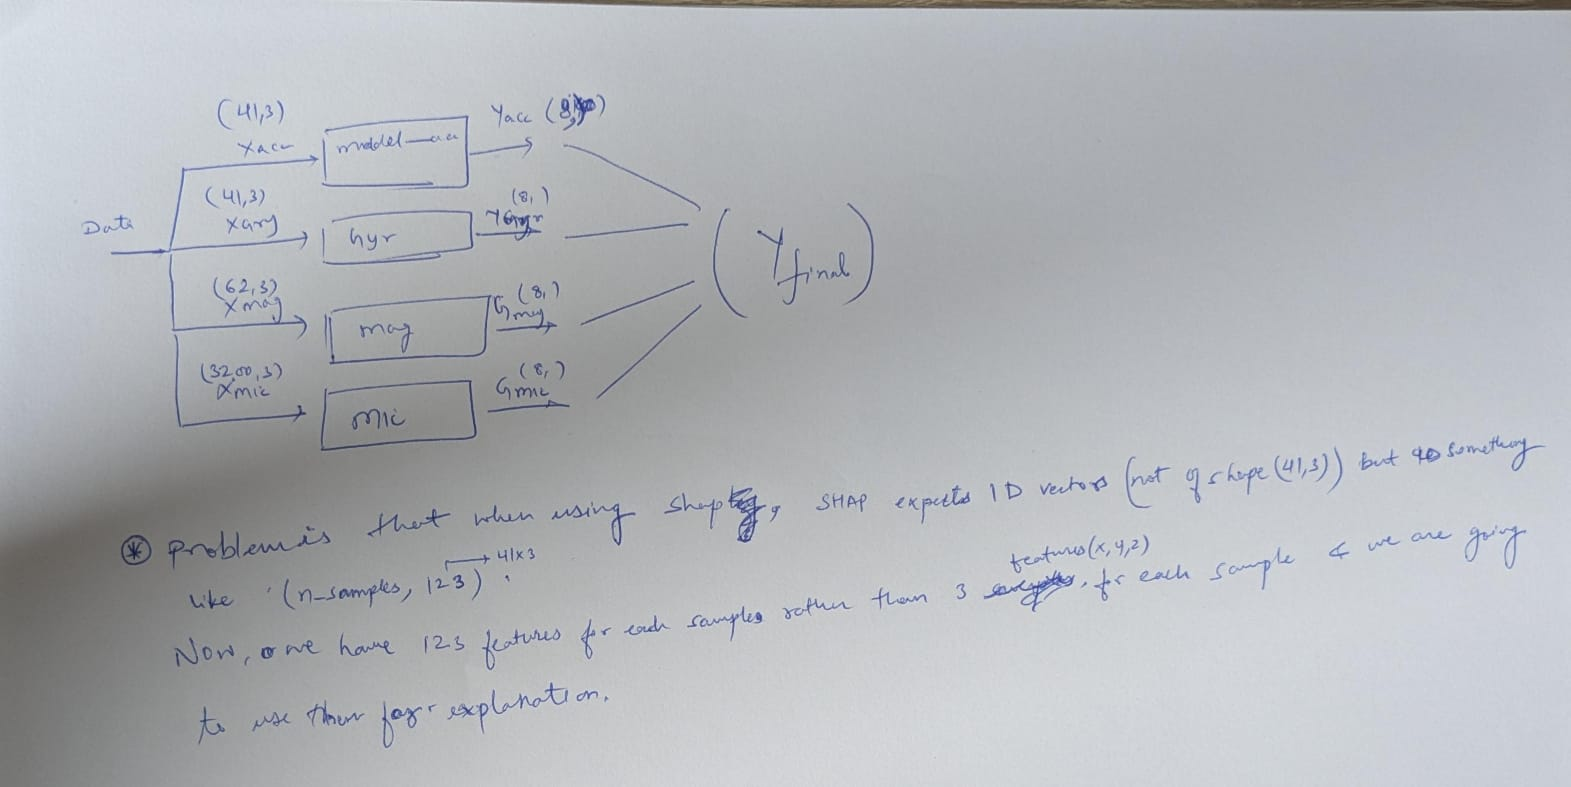

In [191]:
# Define number of time steps and features
time_steps = 41
features = ['x', 'y', 'z']  # adjust based on your sensor axes

# Create index mapping: flat index → (time_step, axis)
index_map = {}
for i in range(time_steps):
    for j in range(len(features)):
        flat_index = i * len(features) + j
        index_map[flat_index] = (i, features[j])

# Example: print first 10 mappings
for k in range(10):
    print(f"Flat index {k} => Time step {index_map[k][0]}, Axis {index_map[k][1]}")

Flat index 0 => Time step 0, Axis x
Flat index 1 => Time step 0, Axis y
Flat index 2 => Time step 0, Axis z
Flat index 3 => Time step 1, Axis x
Flat index 4 => Time step 1, Axis y
Flat index 5 => Time step 1, Axis z
Flat index 6 => Time step 2, Axis x
Flat index 7 => Time step 2, Axis y
Flat index 8 => Time step 2, Axis z
Flat index 9 => Time step 3, Axis x


In [192]:
feature_names = [f"t={i}, axis={a}" for i in range(time_steps) for a in features]


In [193]:
feature_names

['t=0, axis=x',
 't=0, axis=y',
 't=0, axis=z',
 't=1, axis=x',
 't=1, axis=y',
 't=1, axis=z',
 't=2, axis=x',
 't=2, axis=y',
 't=2, axis=z',
 't=3, axis=x',
 't=3, axis=y',
 't=3, axis=z',
 't=4, axis=x',
 't=4, axis=y',
 't=4, axis=z',
 't=5, axis=x',
 't=5, axis=y',
 't=5, axis=z',
 't=6, axis=x',
 't=6, axis=y',
 't=6, axis=z',
 't=7, axis=x',
 't=7, axis=y',
 't=7, axis=z',
 't=8, axis=x',
 't=8, axis=y',
 't=8, axis=z',
 't=9, axis=x',
 't=9, axis=y',
 't=9, axis=z',
 't=10, axis=x',
 't=10, axis=y',
 't=10, axis=z',
 't=11, axis=x',
 't=11, axis=y',
 't=11, axis=z',
 't=12, axis=x',
 't=12, axis=y',
 't=12, axis=z',
 't=13, axis=x',
 't=13, axis=y',
 't=13, axis=z',
 't=14, axis=x',
 't=14, axis=y',
 't=14, axis=z',
 't=15, axis=x',
 't=15, axis=y',
 't=15, axis=z',
 't=16, axis=x',
 't=16, axis=y',
 't=16, axis=z',
 't=17, axis=x',
 't=17, axis=y',
 't=17, axis=z',
 't=18, axis=x',
 't=18, axis=y',
 't=18, axis=z',
 't=19, axis=x',
 't=19, axis=y',
 't=19, axis=z',
 't=20, ax

C:\Users\gshub\AppData\Local\Temp\ipykernel_17128\1756016467.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[0], X_explain_flat[0])


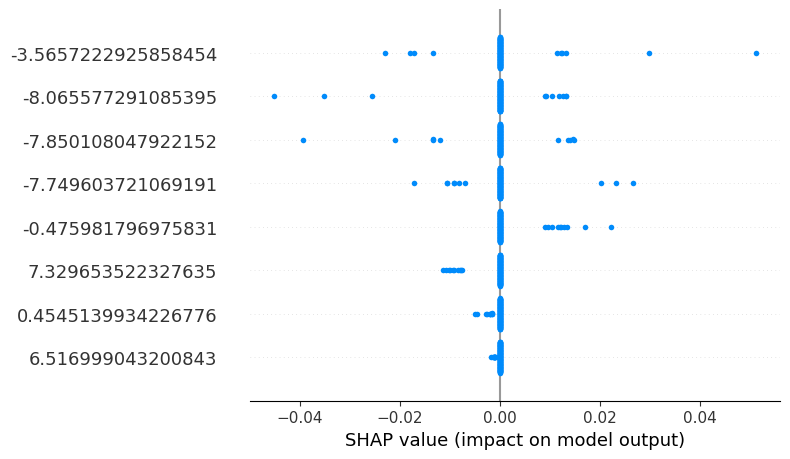

In [194]:
shap.summary_plot(shap_values[0], X_explain_flat[0])

In [195]:
shap_values.shape

(5, 123, 8)

In [196]:
shap_values[0][1]

array([ 0.        ,  0.        ,  0.        , -0.00502089,  0.        ,
        0.        ,  0.01323563,  0.        ])

In [197]:
# Aggregate across all 8 classes by summing absolute SHAP values
shap_importance = np.abs(shap_values).sum(axis=2)  # shape becomes (5, 123)

In [198]:
# Define axes for decoding flat indices
axes = ['x', 'y', 'z']
time_steps = 41

for i, sample_shap in enumerate(shap_importance):
    max_index = np.argmax(sample_shap)  # Flat feature index with highest impact
    time_step = max_index // len(axes)
    axis = axes[max_index % len(axes)]
    print(f"[Sample {i}] Most influential feature: t={time_step}, axis={axis}, SHAP={sample_shap[max_index]:.4f}")


[Sample 0] Most influential feature: t=40, axis=y, SHAP=0.1739
[Sample 1] Most influential feature: t=0, axis=x, SHAP=0.0797
[Sample 2] Most influential feature: t=40, axis=y, SHAP=0.0609
[Sample 3] Most influential feature: t=40, axis=y, SHAP=0.1175
[Sample 4] Most influential feature: t=36, axis=y, SHAP=0.0804


In [199]:
# Mean absolute SHAP value across samples
shap_per_class = np.abs(shap_values).mean(axis=0)  # Shape: (123, 8)


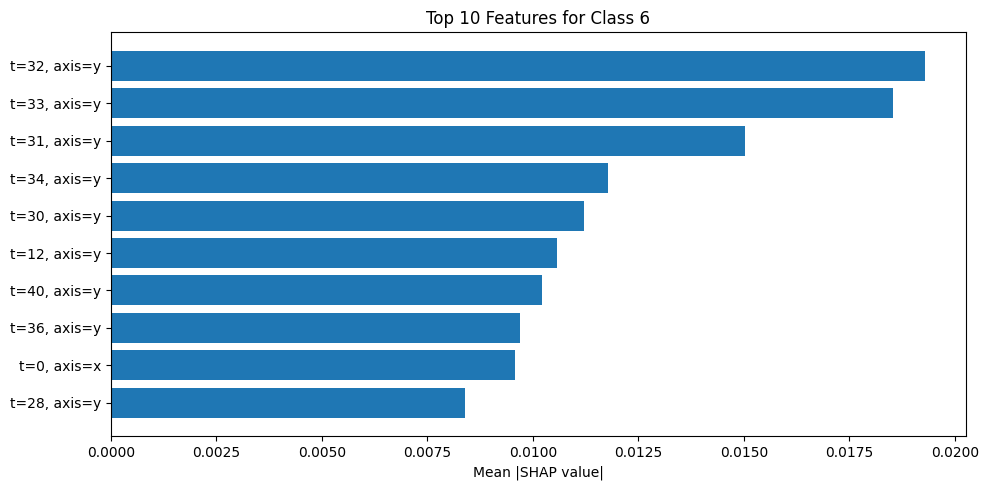

In [200]:
import matplotlib.pyplot as plt
import numpy as np

class_index = 6  # change as needed
top_n = 10

# Get top features for this class
top_features = np.argsort(shap_per_class[:, class_index])[::-1][:top_n]
top_values = shap_per_class[top_features, class_index]
top_names = [feature_names[i] for i in top_features]  # you must define feature_names earlier

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_names[::-1], top_values[::-1])  # reverse to show highest on top
plt.xlabel("Mean |SHAP value|")
plt.title(f"Top {top_n} Features for Class {class_index}")
plt.tight_layout()
plt.show()


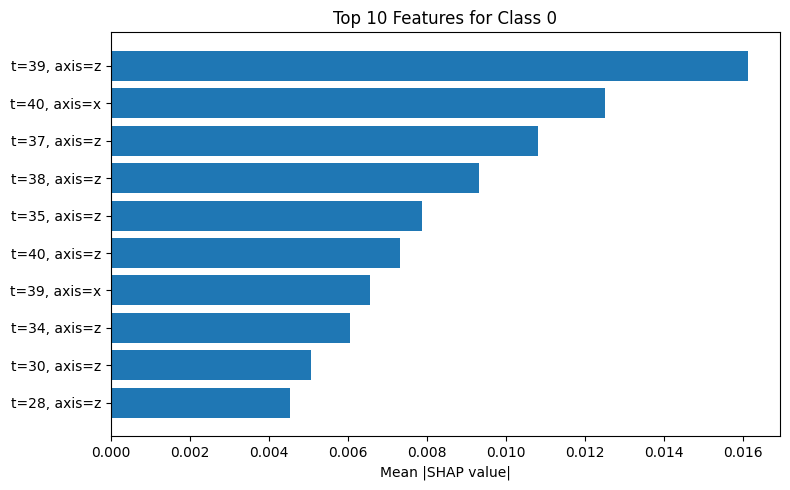

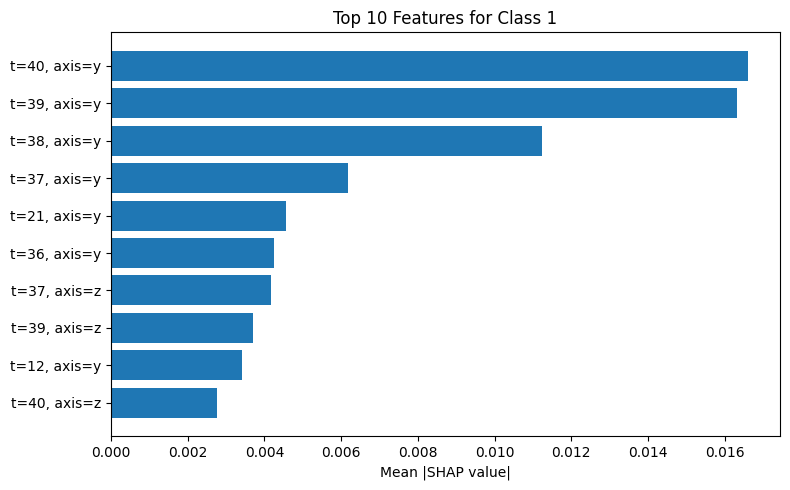

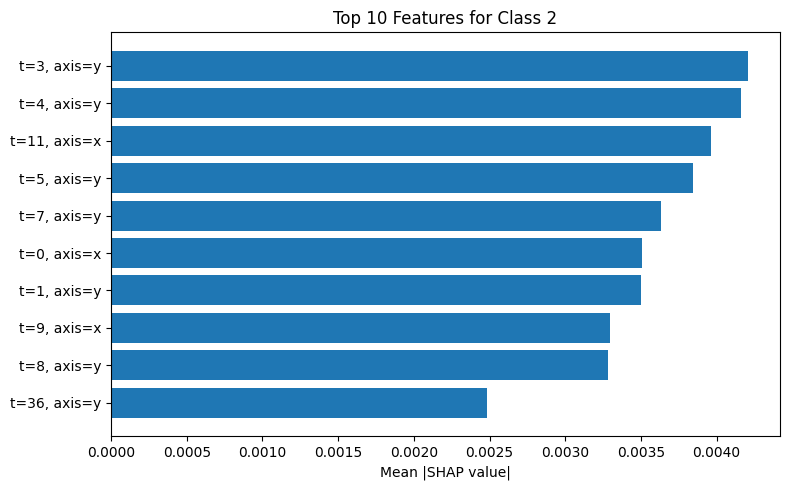

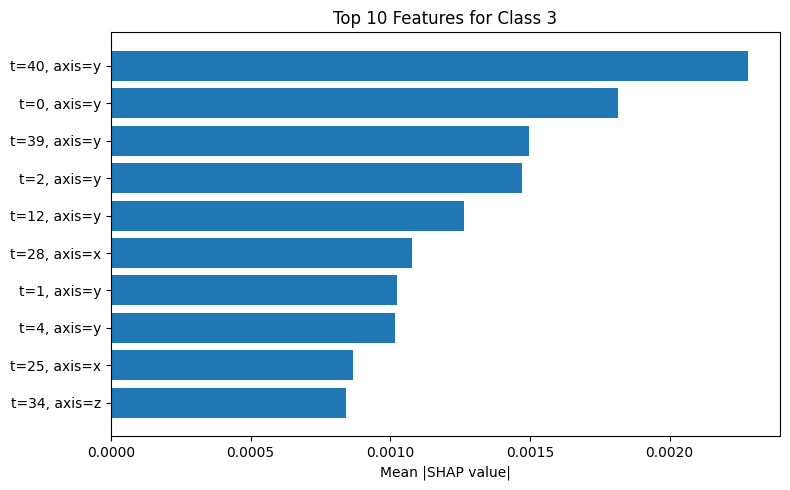

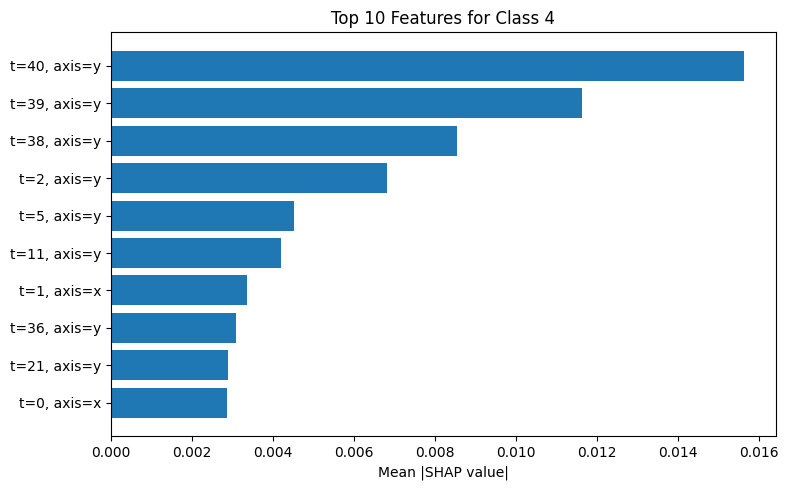

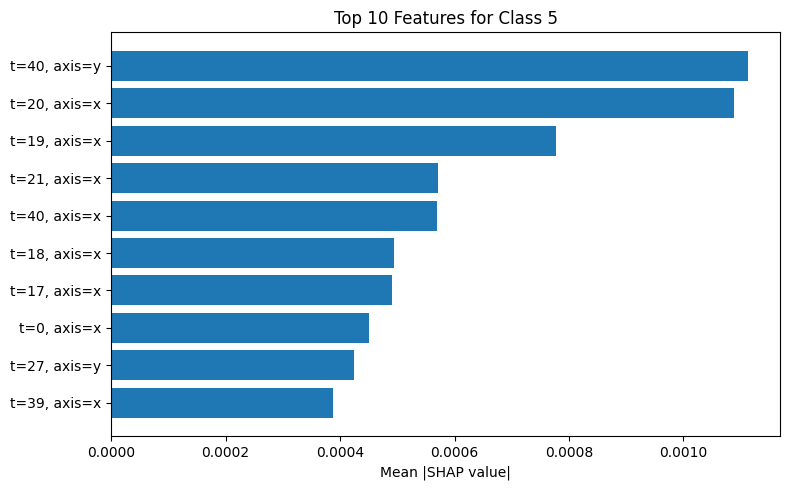

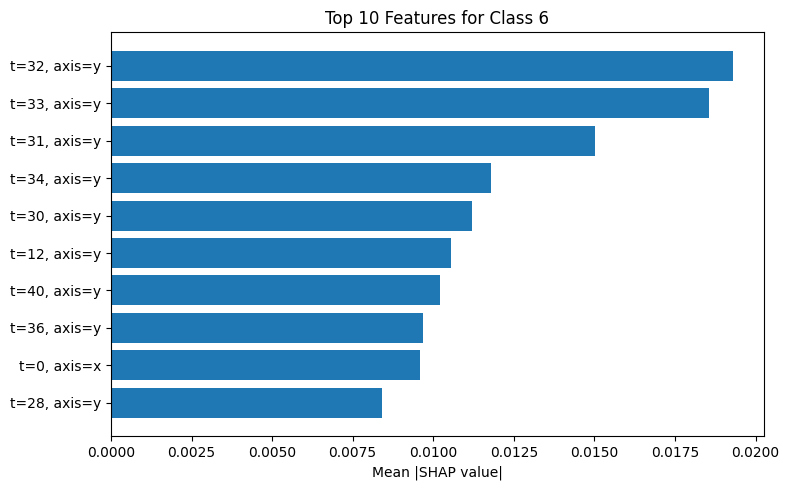

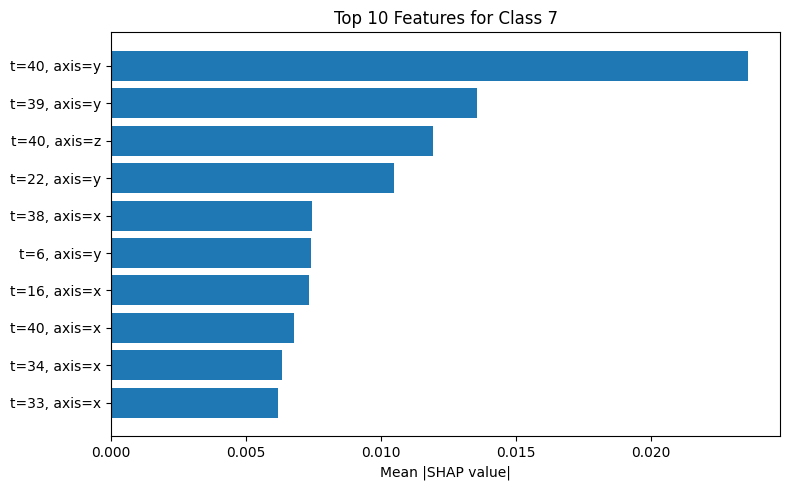

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Get absolute SHAP values
shap_abs = np.abs(shap_values)  # Shape: (5, 123, 8)

# 2. Mean over samples to get (123, 8): feature × class
shap_per_class = shap_abs.mean(axis=0)

# 3. Plot top N features per class
top_n = 10
num_classes = shap_per_class.shape[1]

for class_idx in range(num_classes):
    # Get top N features for this class
    top_features = np.argsort(shap_per_class[:, class_idx])[::-1][:top_n]
    top_values = shap_per_class[top_features, class_idx]
    top_labels = [feature_names[i] for i in top_features]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.barh(top_labels[::-1], top_values[::-1])  # reverse for descending order
    plt.xlabel("Mean |SHAP value|")
    plt.title(f"Top {top_n} Features for Class {class_idx}")
    plt.tight_layout()
    plt.show()


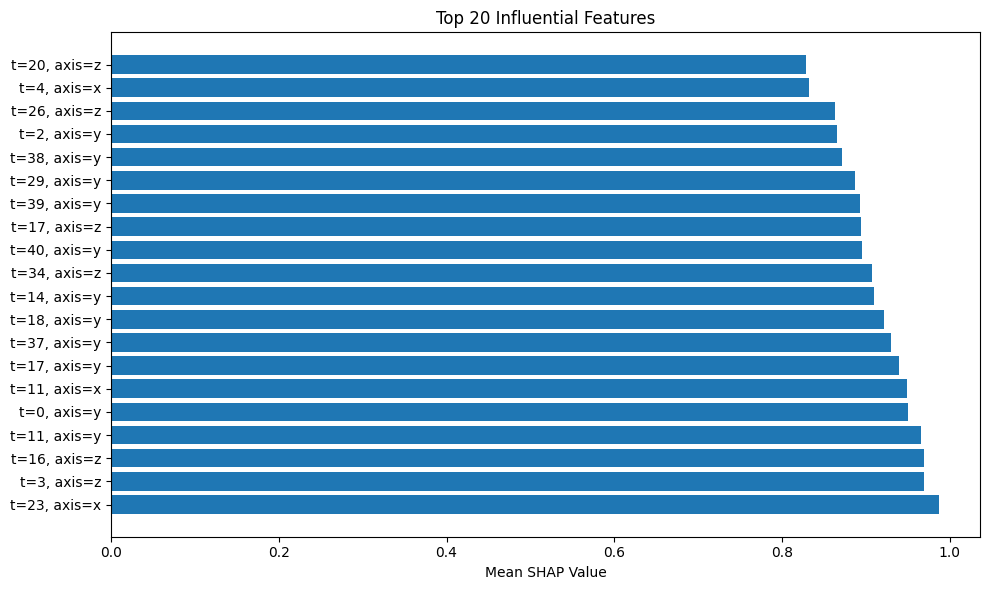

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated mean SHAP values for 123 features (e.g., 41 timesteps * 3 axes)
np.random.seed(42)
mean_shap = np.random.rand(123)

# Define axis labels
axes = ['x', 'y', 'z']
time_steps = 41
feature_labels = [f"t={t}, axis={axes[i % 3]}" for i, t in enumerate(range(time_steps * 3))]

# Adjust the label list to match 123 features correctly
feature_labels = []
for t in range(time_steps):
    for a in axes:
        feature_labels.append(f"t={t}, axis={a}")

# Sort SHAP values and labels by importance
sorted_indices = np.argsort(mean_shap)[::-1]
sorted_shap = mean_shap[sorted_indices]
sorted_labels = [feature_labels[i] for i in sorted_indices]

# Plotting the top 20 influential features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_shap[:top_n][::-1], align='center')
plt.yticks(range(top_n), sorted_labels[:top_n][::-1])
plt.xlabel('Mean SHAP Value')
plt.title('Top 20 Influential Features')
plt.tight_layout()
plt.gca().invert_yaxis()

plt.show()
